Osnabrück University - Computer Vision (Winter Term 2019/20) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, November 16, 2019**. 
Please upload your results to your group's Stud.IP folder.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

convolution means changing the pixels of a pictures with so called kernels. the pixel in the ceneter gets changed according to numbers in kernel via matrix multiplication 

-> image gets transformed 
this helps in cases like edge detectin, smoothing, sharpening...
--> from this we can try and learn features for ex. 

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

linear -> same kernel for whole picture/ each pixel same operation, to pictures added then kernel applied or first kernel each picture then added would yield same result 

homogenous -> you do the same operation for all pixel, it is location invariant 



### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

additions = k-1 
multiplications = k
for each pixel

g*(k+k-1) 

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we dthe kernel size is $m \times n$ as opposed to Assignment *1c)*. This is a shorter notation.

if a kernel consist of only one line of non 0 values in both directions it does not have to be two dimensional but can be seperated into two 1d kernel which is computationally not O(mn) but O(n+m) 

single pixel:
multiplications:m
additions: m-1 for 1D m- kernel 

ie 
mult: m+n
add: m+n-2 (for two 1dkernel) 

gesamt : g * (m+n + m+n-2) = g *(2m+1+2n+1+2m+1+2n+1-2) = g *(4m +

2m+1+2n+1+2m+1+2n+1-2 = 

m = (2m+1)
n = (2n+1) 

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

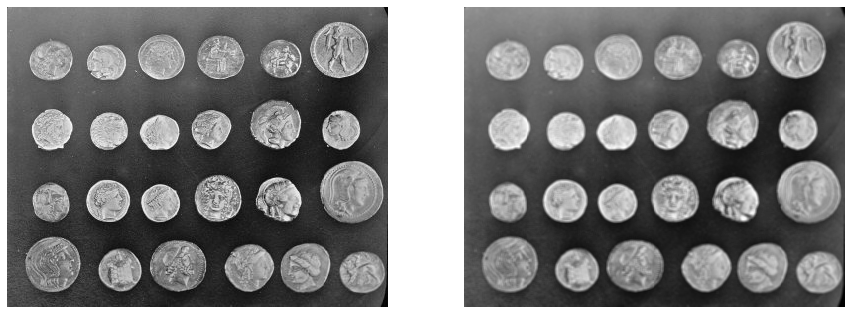

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)
box_filter = np.array([[1,1,1],[1,1,1],[1,1,1]])*1/9
filtered_image = scipy.ndimage.filters.convolve(image,box_filter, mode='nearest' ) # replace this by your solution
# YOUR CODE HERE

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

#hard borders, weights everything equally, extreme values in "periphery" have strong influence

### b) Gaussian filter

You may try different filter sizes.

[[1 2 1]
 [2 4 2]
 [1 2 1]]


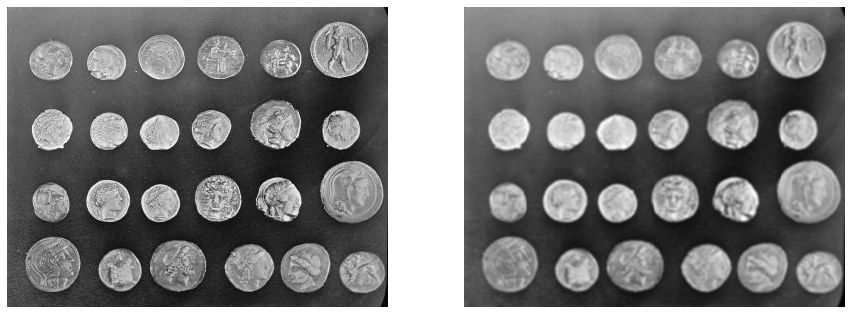

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)
#gauss_filter = np.array([[1,2,1],[2,4,2],[1,2,1]])*1/16

gauss_filter = np.array([1,2,1])*np.array([[1],[2],[1]])

print(gauss_filter)

gauss_filter_big = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])*1/256

filtered_image =  scipy.ndimage.filters.convolve(image,gauss_filter_big, mode='nearest' ) # replace this by your solution

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


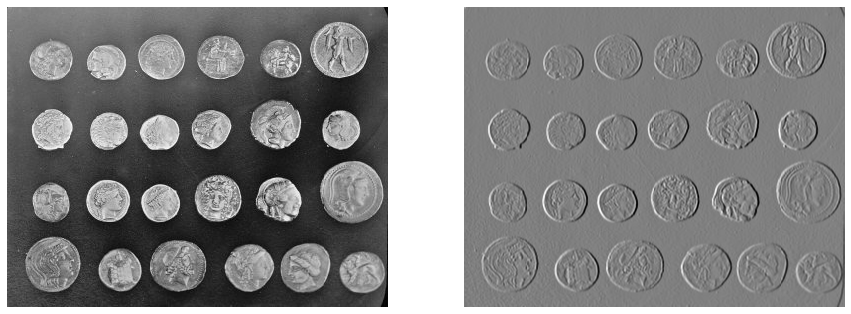

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

prewitt_filter_x  = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
prewitt_filter_y  = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

sobel_filter_x = prewitt_filter_x * gauss_filter
sobel_filter_y = prewitt_filter_y * gauss_filter

print(sobel_filter_x)

filtered_image_sobel = scipy.ndimage.filters.convolve(image,sobel_filter_x, mode='nearest' ) # replace this by your solution
#filtered_image_x = scipy.ndimage.filters.convolve(image,sobel_filter_x, mode='nearest' )

#filteres_image = filtered_image * filtered_image_x

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image_sobel, cmap = 'gray')
plt.axis('off')
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


because you subtract the unsharp image 

normalizing means setting all values to floats and orgnise them between 0 and 1. 
clipping means multiplyinfg those float values and setting 

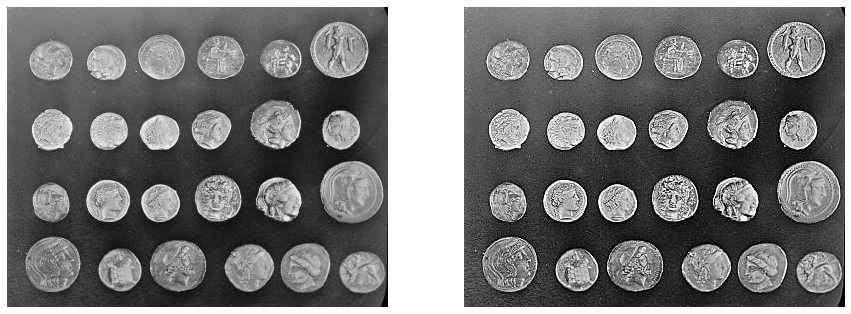

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

unsharped_mask_image = scipy.ndimage.filters.convolve(image,gauss_5, mode='nearest' )

sharped_image = image + (image - unsharped_mask_image)*amount

sharped_image = np.clip(sharped_image, 0,255)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(sharped_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

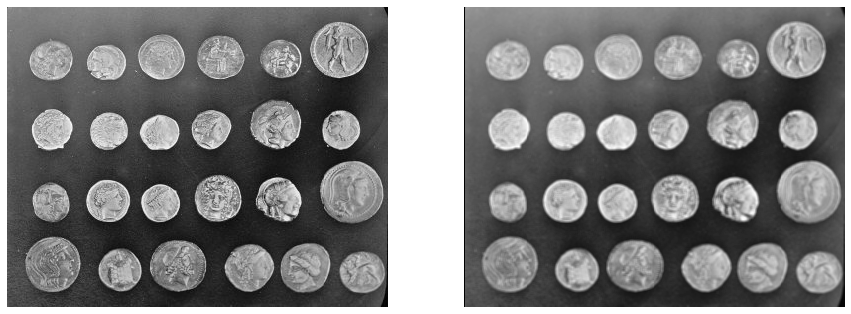

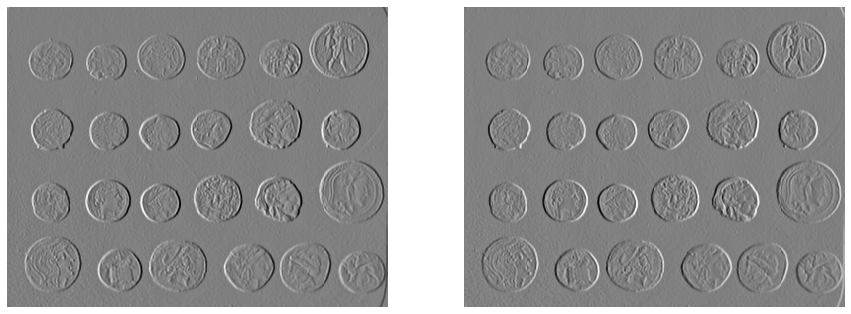

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    #print(result.shape)
    # Compute the convolution
    pad_pic = np.pad(img, (mh,nh), mode = 'edge')
    #print(working_pic.shape)
    pad_i = pad_pic.shape[0]- mh
    pad_j = pad_pic.shape[1]- mh
    
    for i in range(pad_pic.shape[0]):
        for j in range(pad_pic.shape[1]): 
            if i > mh and j> nh and i<pad_i and j< pad_j:
                sub_image = pad_pic[i-mh:i+mh+1,j-nh:j+nh+1]
                #print(sub_image.shape)
                #print(kern.shape)
                result_uno = np.sum(sub_image* kern)
                #print(result_uno)
                result[i-mh,j-nh] = np.sum(sub_image* kern)
    
    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = data.coins().astype(np.float32)

box_3 = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])

filtered_image_1 = my_convolve2d(image,sobel_filter_x)

filtered_image = my_convolve2d(image,box_3)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(filtered_image_sobel, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image_1, cmap = 'gray')
plt.axis('off')
plt.show()